# **Proyek Analisis Data Media Sumber Berita**


*   Nama              : Charles Dometian
*   Email             : charles.dometian@gmail.com




# **Menentukan pertanyaan yang ingin dianalisis**


*   sourceMedium apa yang memberikan kontribusi terbesar dalam periklanan?
*   Bagaimana demografi pageTitle pada halaman website?
*   pageTitle apa yang memiliki Rasio pentalan tertinggi?
*   Apakah terdapat korelasi antara Rasio_pentalan dengan avgOnTimePage
*   Apakah terdapat korelasi antara users dengan pageview?






# **Import semua packages/library yang digunakan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**

### **Gathering Data**

Tahap ini merupakan proses pengumpulan data untuk menjawab pertanyaan yang ingin dianalis. Pada analsis ini, hanya terdapat satu dataset saja yaitu Media Sumber Berita dataset. Format file ini nantinya akan dibaca menggunakan pandas

In [ ]:
# Memuat tabel Media Sumber Berita
data_df = pd.read_csv("Media Sumber Berita.csv", delimiter=",")

data_df.head(157)

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
151,facebook / cpc,"Edan, Ponsel Ini Punya Baterai 13.000 mAh",198.0,76.923077,215.0,1.837607,101.685393
152,facebook / cpc,Gempa Keras di Jakarta Terasa Lebih dari 1 Menit,180.0,20.000000,215.0,2.388889,233.640000
153,facebook / cpc,Jennifer Dunn dan Deretan Mobil Mewahnya,180.0,100.000000,215.0,23.888889,97.836735
154,facebook / cpc,Kasus Salah Baca Xiaomi Terulang Kembali,180.0,83.333333,215.0,1.990741,178.449438


In [ ]:
# Mengubah nama kolom untuk mempermudah proses analisis
data_analisis_df = data_df.rename(columns={
    'ga:sourceMedium': 'sourceMedium',
    'ga:pageTitle': 'pageTitle',
    'ga:users': 'users',
    'ga:bounceRate': 'bounceRate',
    'ga:pageviews': 'pageviews',
    'ga:pageviewsPerSession': 'pageviewsPerSession',
    'ga:avgTimeOnPage': 'avgTimeOnPage'
})

# Pilih kolom dengan nama yang sesuai setelah rename
data_analisis_baru_df = data_analisis_df[['sourceMedium', 'pageTitle', 'users', 'bounceRate', 'pageviews', 'pageviewsPerSession', 'avgTimeOnPage']]

# Tampilkan head dari data_analisis_df
data_analisis_baru_df.head(157)

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
151,facebook / cpc,"Edan, Ponsel Ini Punya Baterai 13.000 mAh",198.0,76.923077,215.0,1.837607,101.685393
152,facebook / cpc,Gempa Keras di Jakarta Terasa Lebih dari 1 Menit,180.0,20.000000,215.0,2.388889,233.640000
153,facebook / cpc,Jennifer Dunn dan Deretan Mobil Mewahnya,180.0,100.000000,215.0,23.888889,97.836735
154,facebook / cpc,Kasus Salah Baca Xiaomi Terulang Kembali,180.0,83.333333,215.0,1.990741,178.449438


# **Assessing Data**

Tahap ini merupakan proses mengidentifikasi masalah yang terdapat dalam tiap data, seperti missing value, invalid value, duplicated value dll. Disini saya akan mengidentifikasi data yang akan saya gunakan.

In [ ]:
# Menilai dataset
data_analisis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sourceMedium         156 non-null    object 
 1   pageTitle            156 non-null    object 
 2   users                155 non-null    float64
 3   bounceRate           155 non-null    float64
 4   pageviews            155 non-null    float64
 5   pageviewsPerSession  155 non-null    float64
 6   avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB


*   Jika dilihat, jumlah data yang ada pada tiap kolom memiliki jumlah yang berbeda, dapat diasumsikan bahwa didalam dataset assignment data analyst ini terdapat missing values karena berdasarkan nilai yang ada di kolom users, bounceRate, pageviews, pageviewsPerSession, dan avgTimeOnpage tidak memiliki jumlah nilai yang sama dengan kolom-kolom lainnya sebesar 156 data.
*   Pada tiap kolom telah didefinsikan dengan tipe data yang tepat, seperti contohnya sourceMedium dan pageTitle yang berupa teks didefinisikan dengan tipe data object dan untuk kolom lainnya (users, bounceRate, dll) juga telah didefinisikan dengan tepat yaitu tipe data float karena mengandung angka desimal.


In [ ]:
# Memeriksa kolom yang mengandung missing values
data_analisis_df.isna().sum()

,0
sourceMedium,0
pageTitle,0
users,1
bounceRate,1
pageviews,1
pageviewsPerSession,1
avgTimeOnPage,1


Pada kode di atas berfungsi untuk menampilkan informasi terkait jumlah missing values yang terdapat setiap kolom. Dapat dilihat bahwa terdapat missing values sebanyak 1 data, baik pada kolom users, bounceRate, pageviews, pageviewsPerSession, dan avgTimeOnPage pada halaman. Data missing values ini nanti akan dibersihkan pada tahap data cleaning nanti.

In [ ]:
# Memeriksa duplikasi data
print("Jumlah duplikasi : ", data_analisis_df.duplicated().sum())

Jumlah duplikasi :  0


Pada kode di atas dapat dilihat bahwa tidak terdapat data yang terduplikat sehingga pada proses cleaning data nanti tidak perlu dilakukan pembersihan duplikat terhadap data ini.

# Cleaning Data

Tahap ini merupakan proses untuk membersihkan data berdasarkan assessing data yang telah dilakukan sebelumnya agar hasil analisis data bisa memberikan hasil yang lebih tepat.

In [ ]:
#Memeriksa missing values pada dataset
data_analisis_df[data_analisis_df.users.isna()]

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
155,facebook / cpc,Netizen Ramai Teriakkan,NaN,NaN,NaN,NaN,NaN


Karena data yang kosong hanya berjumlah satu saja, dapat digunakan cleaning dengan teknik dropping, yaitu dengan menghapus seluruh baris yang memiliki missing values. Hal ini tentunya tidak mempengaruhi penilaian analisis karena jumlah data yang di dropping tidak banyak, sehingga metode ini adalah metode yang paling sesuai untuk menangani missing values ini.

In [ ]:
# Membersihkan data null pada dataset
data_analisis_df.dropna(axis=0, inplace=True)

In [ ]:
# Menampilkan hasil pembersihan
data_analisis_df.isna().sum()

,0
sourceMedium,0
pageTitle,0
users,0
bounceRate,0
pageviews,0
pageviewsPerSession,0
avgTimeOnPage,0


Dapat dilihat bahwa kolom users, bounceRate, pageviews, pageviewsPerSession, dan avgTimeOnPage menunjukkan angka nol yang berarti bahwa seluruh missing values telah berhasil dihapus dan menandakan bahwa tahapan cleaning (dropping) berjalan dengan baik.

# Exploratory Data Analysis (EDA)

Tahap ini merupakan proses analisis data yang bertujuan untuk mengeksplorasi dan mengenal sebuah data.

In [ ]:
# Menghitung jumlah source medium (sumber media) yang ada pada dataset
data_analisis_df['sourceMedium'].value_counts()

,count
sourceMedium,
facebook / cpc,150
google / cpc,5


Pada data ini dapat dilihat bahwa source medium (sumber media) terbanyak ditempati oleh Facebook dengan total 150 cpc. Sementara Google, hanya memiliki 5 cpc. Terdapat selisih sebesar 145 cpc yang dimana dapat dibilang perbedaan tersebut cukup besar dari total data yang berjumlah 156 (bagian yang mengandung missing values tidak termasuk dalam data ini).

In [ ]:
# Menampilkan rangkuman parameter statistik dataset
data_analisis_df.describe()

,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1995.722581,31.925982,3607.174194,16.204284,75.428357
std,6449.314679,36.030184,11845.050364,32.522916,77.975259
min,9.000000,0.000000,215.000000,0.000000,2.814915
25%,108.000000,0.000000,287.000000,0.000000,16.948403
50%,233.000000,17.070773,431.000000,2.353535,44.720930
75%,458.000000,62.401881,826.000000,22.194444,109.392803
max,43893.000000,100.000000,83593.000000,268.833333,449.897196


*   Berdasarkan rangkuman parameter statistik di atas, dapat diambil informasi yaitu jumlah users terbagi berdasarkan bacaan terhadap pageTittle sebesar 155 judul, rata-rata jumlah pengguna sebesar 1996, users paling sedikit berjumlah 9, dan user paling banyak berjumlah 43893.
*   Rata-rata bounce rate dari tiap pageTittle sekitar 32%, nilai dari minimum bounce rate sebesar 0, dan nilai dari maksimum bounce rate sebesar 100.
*   Rata-rata jumlah pageviews dari setiap pageTittle sekitar 3607, nilai minimum dari pageviews sebesar 215, dan nilai maksimum dari pageviews sebesar 83593.
*   Rata-rata pageviewes per sesi sekitar 16.
*   Rata-rata waktu yang dihabisakan user berdasarkan tiap pageTittle sebesar 75, rata-rata minimum waktu yang dihabiskan user sekitar 3, dan rata-rata waktu maksimum yang dihabiskan user sekitar 450.





<Figure size 1200x800 with 0 Axes>

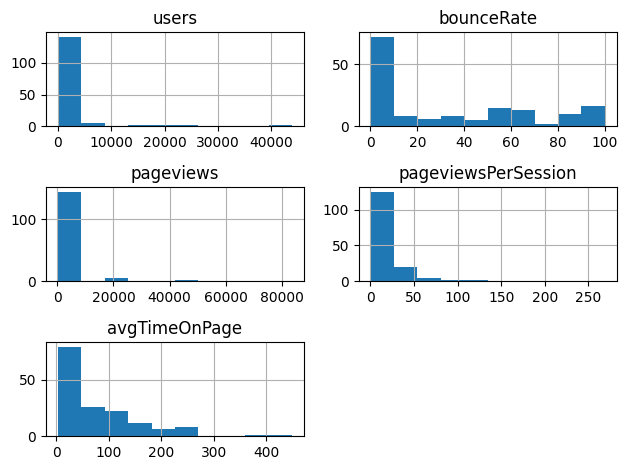

In [ ]:
# Membuat histogram dari dataset yang ada
plt.figure(figsize=(12, 8))
data_analisis_df.hist()
plt.tight_layout()
plt.show()

*   Pada histogram users menggambarkan distribusi frekuensi jumlah pengguna yang mengunjungi situs web dimana sebagian besar pageTittle memiliki jumlah pengguna yang rendah, dengan jumlah pengguna yang sangat tinggi terjadi dalam kasus yang sangat sedikit. Ini menunjukkan distribusi yang miring ke kanan.
*   Pada histogram bounceRate menampilkan seberapa sering pengunjung meninggalkan situs setelah melihat hanya satu halaman dimana beberapa pageTittle memiliki bounchRate yang rendah, tetapi ada beberapa sesi dengan bounce rate yang tinggi, menunjukkan bahwa sebagian besar pengunjung cenderung berinteraksi lebih lanjut dengan konten.
*   Pada histogram pageviews mewakili total jumlah halaman yang dilihat pada pageTittle dimana sebagian besar situs web memiliki jumlah tampilan halaman yang rendah, dengan hanya sedikit situs yang memiliki jumlah tampilan halaman yang sangat tinggi. Ini menunjukkan distribusi miring ke kanan.
*   Pada histogram PageviewsPerSession menggambarkan berapa banyak halaman yang dilihat dalam satu sesi rata-rata di pageTittle,dimana sebagian besar sesi menghasilkan tampilan halaman yang rendah, dengan sedikit sesi yang menghasilkan banyak tampilan halaman. Ini juga menunjukkan distribusi miring ke kanan.
*   Pada histogram avgTimeOnPage menunjukkan berapa lama pengunjung rata-rata menghabiskan waktu di satu halaman sebelum beralih ke halaman lain, dimana Sebagian besar waktu rata-rata yang dihabiskan pada halaman relatif pendek, dengan hanya beberapa halaman yang memiliki waktu rata-rata yang lebih lama.






In [ ]:
# Ekplorasi jumlah pageview berdasarkan pageTittle
data_analisis_df.groupby("pageTitle")['pageviews'].sum().sort_values(ascending=False)

,pageviews
pageTitle,
"Bikin Lambe Turah Diomelin, Nih Si Seksi yang Lengket-lengket sama Gading",83593.0
Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Juta ke Selebgram Mimi Peri,74032.0
"Tak Sesuai Harapan, Barang Belanja Online Ini Bikin Ngakak",54657.0
"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",47924.0
Melihat Kantor Pelayanan Grab Driver Center,44072.0
...,...
"Jokowi Minta Pemda Selaras dengan Pusat, ini Respons Anies",224.0
"Edan, Ponsel Ini Punya Baterai 13.000 mAh",215.0
Jennifer Dunn dan Deretan Mobil Mewahnya,215.0


*   Dapat dilihat bahwa pageTitle yang memiliki pageviews terbanyak adalah "Bikin Lambe Turah Diomelin, Nih Si Seksi yang Lengket-lengket sama Gading" dengan jumlah pageview sebesar 83593.
*   Sementara untuk pageTitle yang memiliki pageviews paling sedikit adalah "Edan, Ponsel Ini Punya Baterai 13.000 mAh", "Jennifer Dunn dan Deretan Mobil Mewahnya", "Kasus Salah Baca Xiaomi Terulang Kembali", dan "Gempa Keras di Jakarta Terasa Lebih dari 1 Menit"



In [ ]:
# Ekplorasi jumlah bouncrate berdasarkan pageTittle
data_analisis_df.groupby("pageTitle")['bounceRate'].sum().sort_values(ascending=False)

,bounceRate
pageTitle,
"Gempa 6,4 SR Guncang Jakarta",150.0
Polisi Tangkap Kernet yang Perkosa Siswi SMK Hingga Punya Anak,100.0
Penampakan Rumah di Lebak yang Rusak Akibat Gempa Banten,100.0
Siswi SMK di Banyumas Bunuh Bayi yang Baru Dilahirkannya,100.0
"Istri Jual Suami Demi Layanan Fantasi, Polisi: Motifnya Ekonomi",100.0
...,...
"Ibunda Idap Tumor Usus, Kiki Farel Berusaha Tetap Fokus Kerja",0.0
Hujan Gerimis dan Tangisan Cucu saat Sys NS Dimasukkan ke Liang Lahat,0.0
"Gempa 6,4 SR Guncang Ibu Kota",0.0


*   Dapat dilihat bahwa pageTitle yang memiliki bounceRate tertinggi adalah "Gempa 6,4 SR Guncang Jakarta" ini berarti persentase users meninggalkan pagetitle setelah melihat halaman ini tanpa melakukan interaksi lebih lanjut (interaksi yang sangat minim).
*   Sementara untuk pageTitle yang memiliki paling sedikit bounceRate adalah "Ibunda Idap Tumor Usus, Kiki Farel Berusaha Tetap Fokus Kerja	", "Hujan Gerimis dan Tangisan Cucu saat Sys NS Dimasukkan ke Liang Lahat", "Gempa 6,4 SR Guncang Ibu Kota", "Gaya Rambut Pasha Ungu yang Pernah Jadi Tren, Mohawk Hingga Air Mancur", "Waspadai Hoax soal Gempa Banten, Termasuk Info dan Gambar Ini" ini berarti users masih melakukan interaksi lebih lanjut pada halaman website dan bisa dikatakan interaksi user di pageTitle ini sangat tinggi.



In [ ]:
# Memeriksa korelasi antara bounchRate dengan avgTimeOnPage
data_analisis_df['bounceRate'].corr(data_analisis_df['avgTimeOnPage'])

0.44709486984225755

Nilai korelasi sebesar 0.447 menunjukkan adanya korelasi positif yang lemah antara kedua variabel (bounch rate dan avgtimeonpage) yang berarti ketika avg time on page meningkat, bounce rate cenderung juga meningkat, namun hubungan ini tidak terlalu kuat.

Karena hubungan ini tidak terlalu kuat, kemungkinan masih ada faktor-faktor lain yang juga mempengaruhi kedua variabel tersebut dan meskipun ada kecenderungan positif hasil ini tidak bisa dijadikan prediksi akurat tentang satu variabel hanya berdasarkan variabel yang lain.

In [ ]:
# Memeriksa korelasi antara user dengan pageviews
data_analisis_df['users'].corr(data_analisis_df['pageviews'])

0.7449928679241895

Nilai korelasi sebesar 0.745 menunjukkan korelasi positif yang kuat antara jumlah pengguna dan jumlah tampilan halaman yang berarti ketika jumlah pengguna meningkat, jumlah tampilan halaman juga cenderung meningkat. Sebaliknya, jika jumlah pengguna menurun, jumlah tampilan halaman juga cenderung menurun.

# **Visualization & Explanatory Analysis**


Tahap ini merupakan proses analisis data yang bertujuan untuk membagikan beberapa insight yang menarik dari sebuah data dimana insight inilah yang akan digunakan untuk membantu menjawab dan memahami pertanyaan yang dihadapi.

# **Jawaban dari pertanyaan 1**

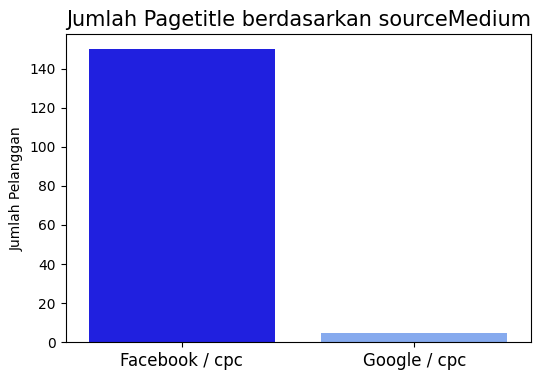

In [ ]:
# Dataframe yang berisi jumlah pelanggan berdasarkan sourceMedium
data_analisis_df = pd.DataFrame({
    'sourceMedium': ['Facebook / cpc', 'Google / cpc'],
    'count': [150, 5]
})

# Membuat plot
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["#0000FF", "#75A4FF"]

sns.barplot(
    x="sourceMedium",
    y="count",
    data=data_analisis_df,
    palette=colors,
    hue="sourceMedium",
    dodge=False,
    ax=ax,
    legend=False
)

# Menambahkan judul dan mengatur ukuran label
ax.set_title("Jumlah Pagetitle berdasarkan sourceMedium", loc="center", fontsize=15)
ax.set_xlabel(None)
ax.set_ylabel("Jumlah Pelanggan")
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)

# Menampilkan plot
plt.show()

Berdasarkan diagram batang diatas, dapat dilihat bahwa Facebook merupakan sourcemedium/sumber media terbesar jika dibandingkan dengan Google. Ini menandakan bahwa sebagian besar judul berita yang disajikan bersumber dari Facebook.

Selain itu, hal ini juga memastikan bahwa users lebih banyak menerima berita dari Facebook daripada Google jika dibandingkan secara total keseluruhan pengguna maupun berdasarkan pageview dari users yang dibuktikan lebih banyaknya pagetitle yang dihasilkan oleh Facebook.

# **Jawaban dari pertanyaan 2**

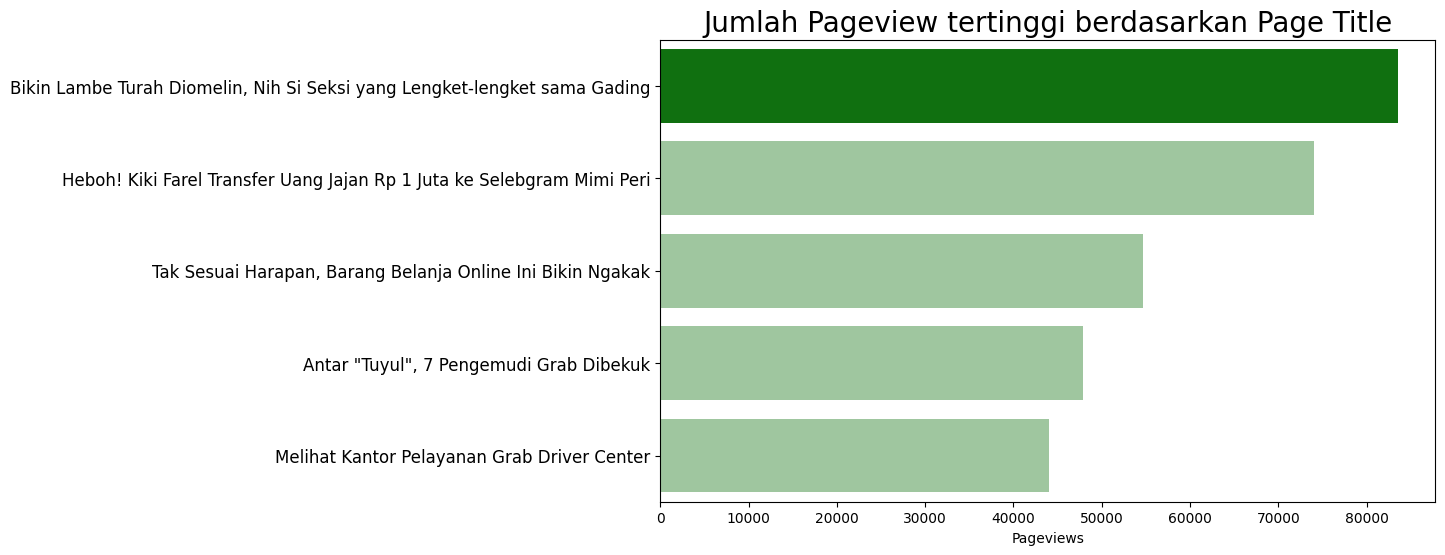

In [ ]:
# Dataframe yang berisi pageTitle dan pageviews
data_analisis_df = pd.DataFrame({
    'pageTitle': [
        'Bikin Lambe Turah Diomelin, Nih Si Seksi yang Lengket-lengket sama Gading',
        'Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Juta ke Selebgram Mimi Peri',
        'Tak Sesuai Harapan, Barang Belanja Online Ini Bikin Ngakak',
        'Antar "Tuyul", 7 Pengemudi Grab Dibekuk',
        'Melihat Kantor Pelayanan Grab Driver Center'
    ],
    'pageviews': [83593.0, 74032.0, 54657.0, 47924.0, 44072.0]
})

# Mengurutkan data berdasarkan bounceRate dalam urutan menurun
top_pages = data_analisis_df.sort_values(by="pageviews", ascending=False)

# Create a custom palette with one dark green and the rest light green
colors = ["#008000"] + ["#99CC99"] * (len(top_pages) - 1)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x="pageviews",
    y="pageTitle",
    data=top_pages,
    palette=colors,
    hue="pageTitle",
    dodge=False,
    ax=ax,
    legend=False
)

# Menyesuaikan plot
ax.set_title("Jumlah Pageview tertinggi berdasarkan Page Title", loc="center", fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel("Pageviews")
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=10)

# Menampilkan plot
plt.show()

Berdasarkan diagram batang diatas, "Bikin Lambe Turah Diomelin, Nih Si Seksi yang lengket-lengket sama Gading" merupakan pageTitle/judul halaman yang mendapatkan paling banyak view dibadingkan judul halaman lainnya.

Selain itu, dari tiga teratas judul berita ini yang paling mendapatkan banyak pageviews adalah berita yang bertemakan tentang selebriti dan hiburan. Ketiga berita ini mendapatkan lebih banyak perhatian dari users daripada tema-tema lainnya yang dibuktikan dari lebih banyaknya pageviews pada ketiga berita ini.

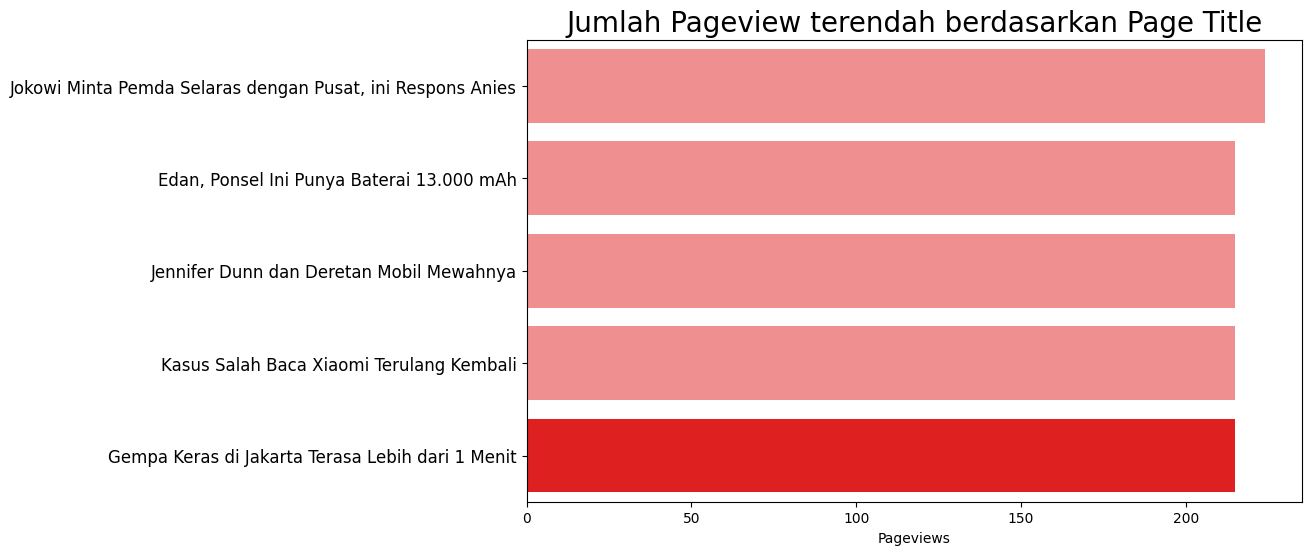

In [ ]:
# Dataframe yang berisi pageTitle dan pageviews
data_analisis_df = pd.DataFrame({
    'pageTitle': [
        'Jokowi Minta Pemda Selaras dengan Pusat, ini Respons Anies',
        'Edan, Ponsel Ini Punya Baterai 13.000 mAh',
        'Jennifer Dunn dan Deretan Mobil Mewahnya',
        'Kasus Salah Baca Xiaomi Terulang Kembali',
        'Gempa Keras di Jakarta Terasa Lebih dari 1 Menit'
    ],
    'pageviews': [224.0, 215.0, 215.0, 215.0, 215.0]
})

# Mengurutkan data berdasarkan tampilan halaman dalam urutan menurun
top_pages = data_analisis_df.sort_values(by="pageviews", ascending=False)

# Buat palet khusus dengan satu warna merah tua dan sisanya merah muda
colors = ["#FF7F7F"] * (len(top_pages) - 1) + ["#FF0000"]

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))

# Gunakan parameter rona alih-alih palet
sns.barplot(
    x="pageviews",
    y="pageTitle",
    data=top_pages,
    hue="pageTitle",  # Add this line
    palette=dict(zip(top_pages['pageTitle'], colors)),  # Map colors to pageTitle
    dodge=False,
    ax=ax,
    legend=False
)

# Menyesuaikan plot
ax.set_title("Jumlah Pageview terendah berdasarkan Page Title", loc="center", fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel("Pageviews")
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=10)

# Menampilkan plot
plt.show()

Berdasarkan diagaram batang di atas, "Edan, Ponsel Ini Punya Baterai 13.000 mAH", "Jeniffer Dunn dan Deretan mobil mewahnya", "Kasus salah baca Xiaomi terulang kembali", dan "Gempa Keras di Jakarta" merupakan pageTitle/judul halaman yang mendapatkan paling sedikit view dibadingkan judul halaman lainnya.

Keempat judul berita terbawah ini yang paling seedikit mendapatkan pageviews dimana berita-berita ini bertemakan tentang teknologi, gaya hidup mewah, dan bencana alam. Tema ini sepertinya kurang mendapatkan perhatian/minat dari users untuk membaca berita tersebut yang dibuktikan dari sedikitnya pageviews pada keempat berita ini.


# **Jawaban dari pertanyaan 3**

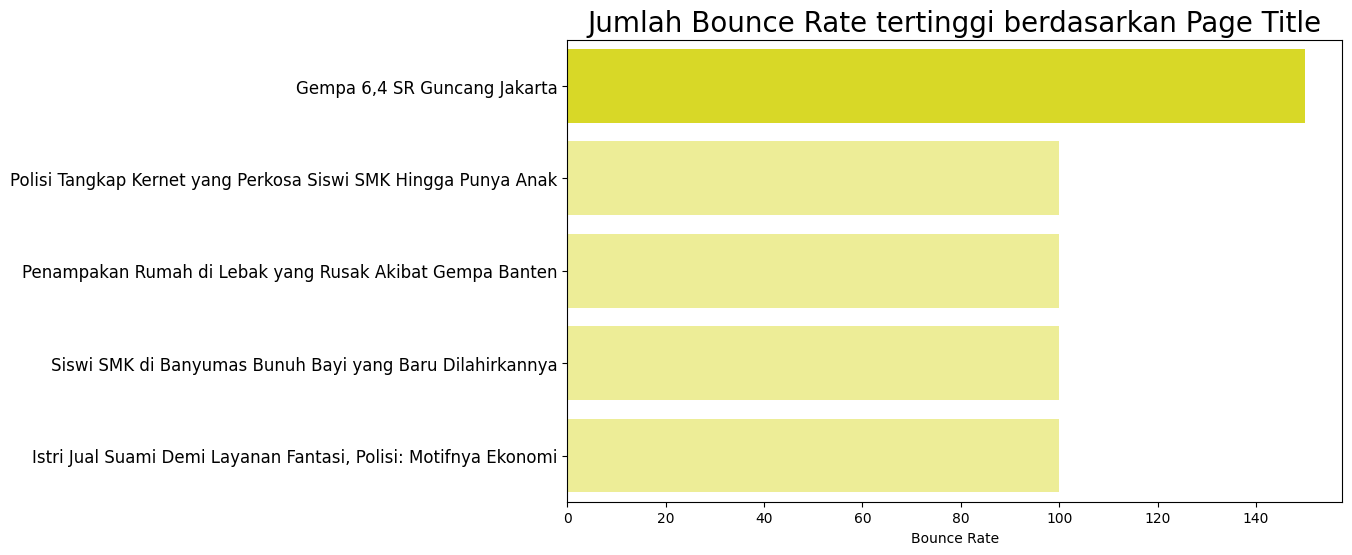

In [ ]:
# Dataframe yang berisi pageTitle dan bounceRate
data_analisis_df = pd.DataFrame({
    'pageTitle': [
        'Gempa 6,4 SR Guncang Jakarta',
        'Polisi Tangkap Kernet yang Perkosa Siswi SMK Hingga Punya Anak',
        'Penampakan Rumah di Lebak yang Rusak Akibat Gempa Banten',
        'Siswi SMK di Banyumas Bunuh Bayi yang Baru Dilahirkannya',
        'Istri Jual Suami Demi Layanan Fantasi, Polisi: Motifnya Ekonomi'
    ],
    'bounceRate': [150.0, 100.0, 100.0, 100.0, 100.0]
})

# Mengurutkan data berdasarkan bounceRate dalam urutan menurun
top_pages = data_analisis_df.sort_values(by="bounceRate", ascending=False)

# Buat palet khusus dengan satu warna hijau tua dan sisanya hijau muda
colors = ["#F6F609"] + ["#FBFB89"] * (len(top_pages) - 1)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x="bounceRate",
    y="pageTitle",
    data=top_pages,
    palette=colors,
    hue="pageTitle",
    dodge=False,
    ax=ax,
    legend=False
)

# Menyesuaikan plot
ax.set_title("Jumlah Bounce Rate tertinggi berdasarkan Page Title", loc="center", fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel("Bounce Rate")
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=10)

# Menampilkan plot
plt.show()

Berdasarkan diagaram batang di atas, "Gempa 6,4 SR Guncang Jakarta" merupakan pagetitle/judul berita yang memiliki bounceRate tinggi, dimana users mengunjungi halaman tersebut tanpa mengklik apapun atau melihat halaman lain dari situs itu. Selain memiliki bounceRate tinggi, berita dengan tema bencana alam juga memiliki peminat baca yang sedikit (dibuktikan dari diagram batang sebelumnya).

Sementara untuk keempat berita lainnya sebagai penyumbang bounceRate tertinggi, rata-rata dari tema ini adalah tentang kriminalitas dan bencana alam. Mungkin untuk tema berita ini masih dianggap kurang menarik bagi user sehingga tidak memancing user untuk mengklik berita lainnya yang ada diwebsite.

# **Jawaban dari pertanyaan 4**

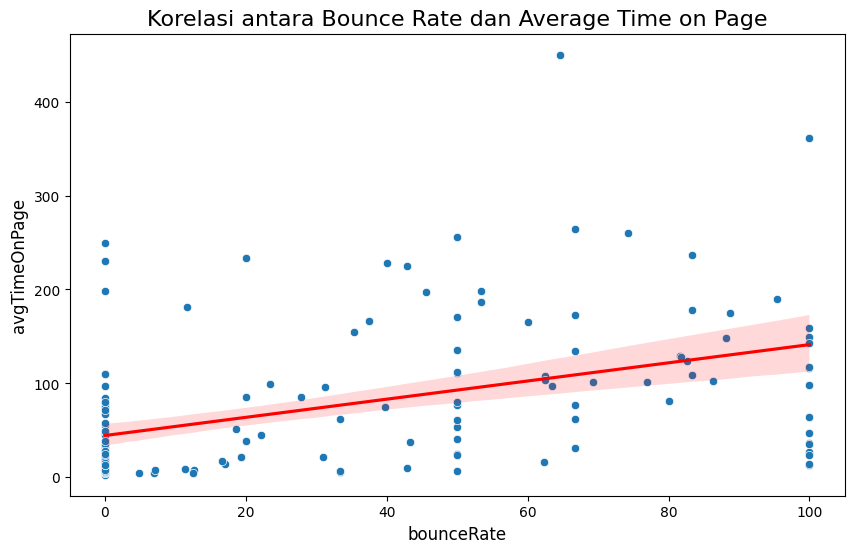

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bounceRate', y='avgTimeOnPage', data=data_analisis_baru_df)

# Menambahkan judul dan label
plt.title('Korelasi antara Bounce Rate dan Average Time on Page', fontsize=16)
plt.xlabel('Bounce Rate (%)', fontsize=12)
plt.ylabel('Average Time on Page', fontsize=12)

# Menambahkan garis regresi
sns.regplot(x='bounceRate', y='avgTimeOnPage', data=data_analisis_baru_df, scatter=False, color='red')

# Menampilkan plot
plt.show()

Dari hasil grafik Scatter Plot ini menunjukkan hubungan antara Bounce Rate dan Average Time on Page di sebuah website. Meskipun ada kecenderungan bahwa ketika Bounce Rate meningkat, waktu rata-rata yang dihabiskan di halaman juga meningkat, hubungan ini tidak terlalu kuat. Ini terlihat dari titik-titik data yang tersebar cukup jauh dari garis merah yang menunjukkan tren umum. Artinya, meskipun ada sedikit hubungan antara kedua hal ini, ada banyak faktor lain yang mempengaruhi, sehingga tidak selalu halaman dengan Bounce Rate tinggi akan memiliki waktu rata-rata yang tinggi, dan sebaliknya.

# **Jawaban dari pertanyaan 5**

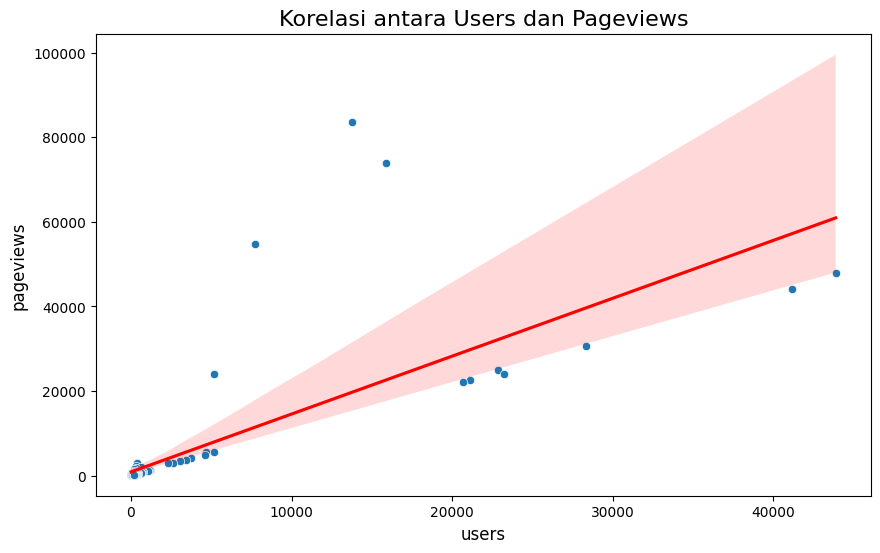

In [ ]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='users', y='pageviews', data=data_analisis_baru_df)

# Menambahkan judul dan label
plt.title('Korelasi antara Users dan Pageviews', fontsize=16)
plt.xlabel('Users (%)', fontsize=12)
plt.ylabel('Pageviews', fontsize=12)

# Menambahkan garis regresi
sns.regplot(x='users', y='pageviews', data=data_analisis_baru_df, scatter=False, color='red')

# Menampilkan plot
plt.show()

Dari hasil grafik scatter plot ini menunjukkan hubungan antara Users dan Pageviews di sebuah website. Dari grafik ini, terlihat bahwa semakin banyak jumlah pengguna (Users), semakin tinggi jumlah halaman yang dilihat (Pageviews). Garis merah yang naik menunjukkan adanya hubungan positif yang kuat antara kedua variabel ini, di mana peningkatan jumlah pengguna biasanya diikuti dengan peningkatan jumlah halaman yang dilihat. Namun, ada juga beberapa titik data yang menyimpang dari tren umum ini, menunjukkan bahwa dalam beberapa kasus, jumlah pengguna yang sama bisa menghasilkan jumlah Pageviews yang sangat bervariasi.

# **Kesimpulan**

1.   Facebook merupakan sourcemedium/sumber media terbesar yang didasarkan pada grafik jumlah dataset pagetitle berdasarkan sourcemedium.
2.   Berita dengan tema selebriti dan hiburan lebih banyak mendapatkan pageviews daripada berita dengan tema teknologi, gaya hidup mewah, dan bencana alam.
3.   Berita dengan tema kriminalitas dan bencana alam masih dianggap kurang menarik bagi user sehingga kurang mengundang interaksi lainnya didalam website.
4.   Terdapat hubungan lemah antara bounceRate dengan avgTimeOnPage yang menunjukkan ada sedikit kecenderungan bahwa halaman dengan bounce rate tinggi juga memiliki waktu kunjungan yang lebih lama, tetapi hubungan ini tidak terlalu kuat dan bervariasi banyak antar halaman.
5.   Terdapat hubungan kuat antara users dan pageview yang menunjukkan bahwa ada hubungan positif antara jumlah pengguna dan jumlah tampilan halaman, tetapi hubungan ini tidak selalu konsisten untuk semua halaman.


